In [1]:
%matplotlib inline

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches as mpatches
from matplotlib.collections import PatchCollection
from IPython.display import Image

# Elements of a Matplotlib Plot

You will notice in the figure below various annotated elements. We can programmatically control all of these using matplotlib functions.

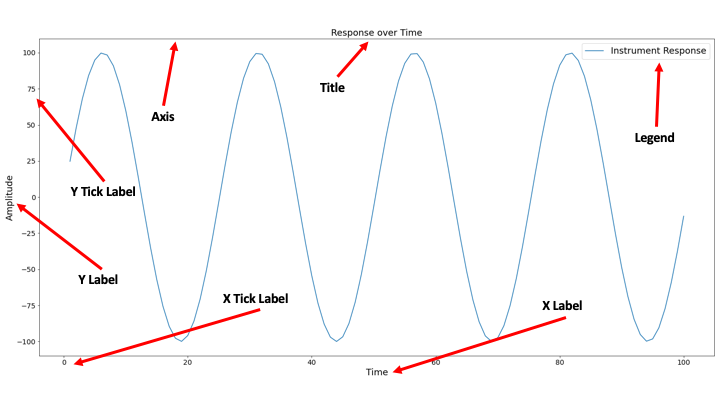

In [43]:
Image(filename='sample_figure_annotated.png')

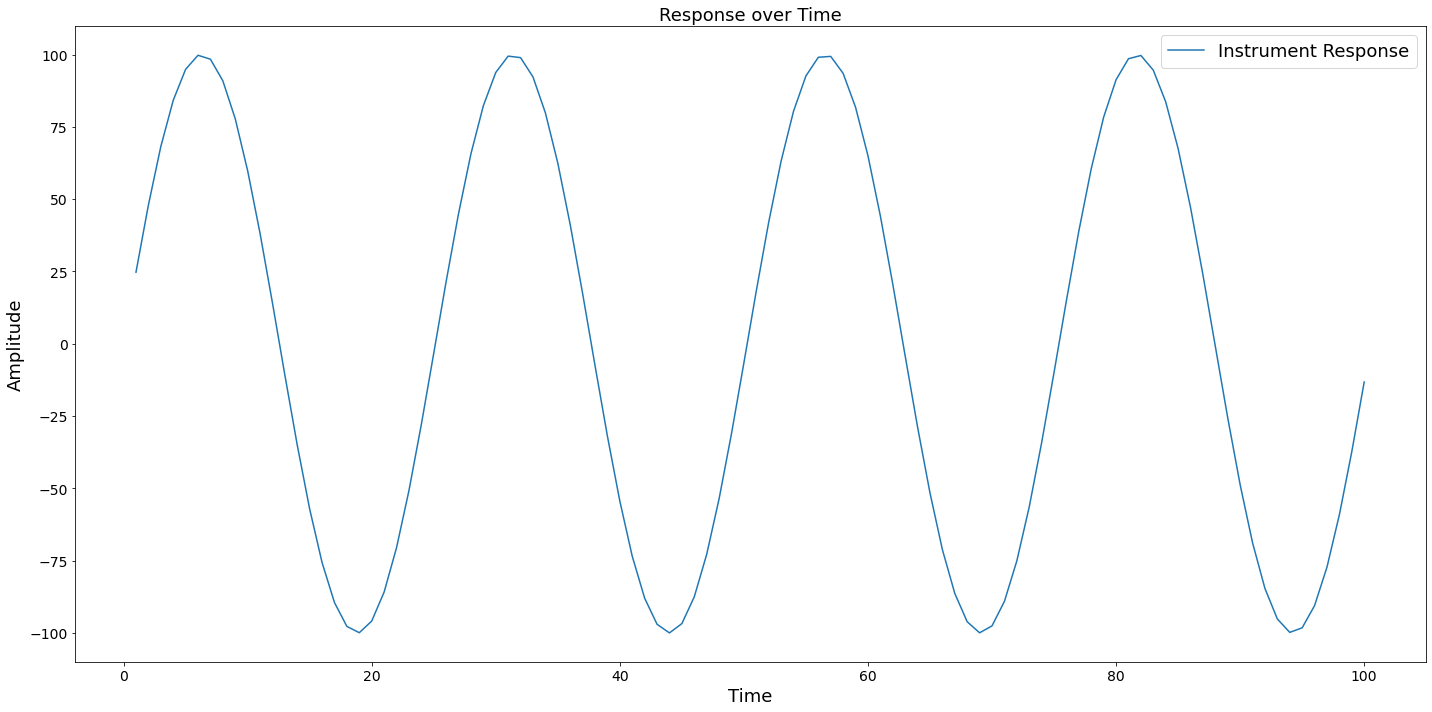

In [41]:
f = plt.figure(figsize=(20,10))
x = np.arange(1,101)
y = np.sin(x/4) * 100
line2d = plt.plot(x,y)
xlabel = plt.xlabel('Time', fontsize=18);
ylabel = plt.ylabel('Amplitude', fontsize=18);
title = plt.title('Response over Time', fontsize=18);

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# adding patches
# patches = []
# patch = mpatches.Circle((44, 50), radius=8)
# patches.append(patch)
# pcollection = PatchCollection(patches, facecolors=['r'])
# ax = plt.gca()
# ax.add_collection(pcollection)
# plt.text(41,32, 'A Patch', fontsize=18);

plt.legend(['Instrument Response'], fontsize=18);
plt.tight_layout()
plt.savefig('sample_figure.png');

In [38]:
labels[0].get_fontsize()

10.0